In [16]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import os
import matplotlib as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [17]:
os.chdir(r'C:\Users\david\OneDrive\Cranfield_matlab_ref\Statistical_Learning\Assignment\data')
Traindata = pd.read_csv('train_selected.csv')
Traindata.columns = ['ID', 'Cycle', 'S1', 'S2', 'S3', 'S4', 'ttf', 'failure Classification']
xtrain = Traindata.drop(['ID','Cycle','ttf', 'failure Classification'], axis=1).values
ytrain = Traindata['failure Classification'].values

In [18]:
Testdata = pd.read_csv('test_selected_ttf.csv')
Testdata.columns = ['ID', 'Cycle', 'S1', 'S2', 'S3', 'S4', 'ttf', 'label bnc']
xtest = Testdata.drop(['ID','Cycle','ttf', 'label bnc'], axis=1).values
ytest = Testdata['label bnc'].values

In [19]:
x = np.array(xtrain)
xtest = np.array(xtest)
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
xtest_norm = scaler.fit_transform(xtest)

In [21]:
model_name_Knn = 'K_Nearest Neighbor Classifier'
Knn_model = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p=1)
Knn_model.fit(xtrain, ytrain)
y_pred_knn = Knn_model.predict(xtest)
y_pred_knn_train = Knn_model.predict(xtrain)
#40-100 neighbours is the best to consider.

In [22]:
print('Accuracy:', metrics.accuracy_score(ytest, y_pred_knn))

Accuracy: 0.9


In [41]:
print('Accuracy:', metrics.accuracy_score(ytrain, y_pred_knn_train))

Accuracy: 0.946388754241396


[[17153   377]
 [  729  2371]]


<AxesSubplot: >

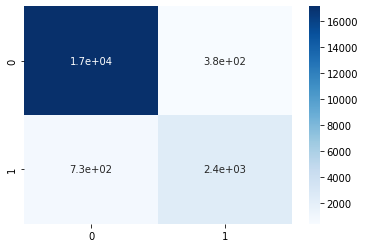

In [43]:
kn_train = confusion_matrix(ytrain, y_pred_knn_train, labels=[0,1])
print(kn_train)
sns.heatmap(kn_train, cmap = 'Blues', annot = True)

[[74  1]
 [ 9 16]]


<AxesSubplot: >

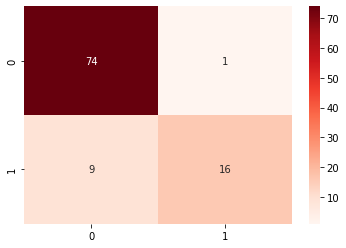

In [24]:
kn = confusion_matrix(ytest, y_pred_knn, labels=[0,1])
print(kn)
sns.heatmap(kn, cmap = 'Reds', annot = True)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
model_name_Bayes= 'Naive Bayes Classifier'
nbClassifier_model= MultinomialNB(alpha=1.0, class_prior = None, fit_prior=True)
nbClassifier_model.fit(x_norm, ytrain)
y_pred_bayes = nbClassifier_model.predict(xtest_norm)

In [27]:
print('Accuracy:', metrics.accuracy_score(ytest, y_pred_bayes))

Accuracy: 0.75


In [31]:
from sklearn.svm import SVC
model_name_SVM = 'Kernel SVM Classifier'
svmClassifier = SVC(kernel='rbf', gamma = 'auto')
svm_model = svmClassifier
svm_model.fit(xtrain, ytrain)
y_pred_svm = svm_model.predict(xtest)
y_p_svm_train = svm_model.predict(xtrain)

In [33]:
print('Accuracy:', metrics.accuracy_score(ytest, y_pred_svm))

Accuracy: 0.89


In [44]:
print('Accuracy:', metrics.accuracy_score(ytrain, y_p_svm_train))

Accuracy: 0.9447406689287445


[[17126   404]
 [  736  2364]]


<AxesSubplot: >

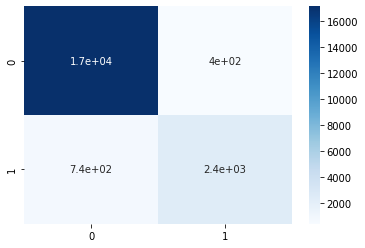

In [45]:
svm_train = confusion_matrix(ytrain, y_p_svm_train, labels=[0,1])
print(svm_train)
sns.heatmap(svm_train, cmap = 'Blues', annot = True)

[[74  1]
 [ 9 16]]


<AxesSubplot: >

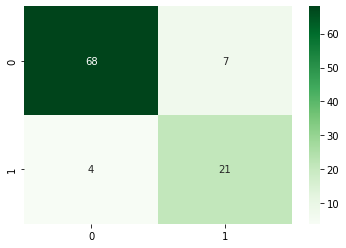

In [14]:
sv = confusion_matrix(ytest, y_pred_svm, labels=[0,1])
print(kn)
sns.heatmap(sv, cmap = 'Greens', annot = True)

In [38]:
model_logisic = 'Logistic Regression Classifier'
lgc = LogisticRegression(random_state=0, multi_class = 'auto', solver='lbfgs', max_iter=1000)
lgc.fit(xtrain, ytrain)
y_pred_lgc = lgc.predict(xtest)
y_pred_lgc_t = lgc.predict(xtrain)

In [39]:
print('Accuracy:', metrics.accuracy_score(ytest, y_pred_lgc))

Accuracy 0.89


In [46]:
print('Accuracy:', metrics.accuracy_score(ytrain, y_pred_lgc_t))

Accuracy: 0.9472127968977218


[[17095   435]
 [  654  2446]]


<AxesSubplot: >

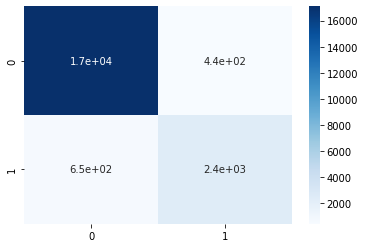

In [47]:
y_pred_lgc_t = confusion_matrix(ytrain, y_pred_lgc_t, labels=[0,1])
print(y_pred_lgc_t)
sns.heatmap(y_pred_lgc_t, cmap = 'Blues', annot = True)

[[68  7]
 [ 4 21]]


<AxesSubplot: >

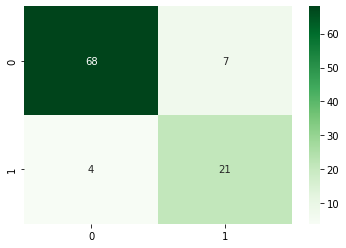

In [116]:
log = confusion_matrix(ytest, y_pred_lgc, labels=[0,1])
print(log)
sns.heatmap(log, cmap = 'Greens', annot = True)